# Linear Regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The fille ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Create a dataframe from the text file with data

In [2]:
path = open(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex1data2.txt')
data = pd.read_csv(path, header=None, names=['Size (square feet)', 'Bedrooms', 'Price'])
data.head()

,Size (square feet),Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Let's plot our dataset on the 3D scatter plot


Text(0.5, 0, 'Price')

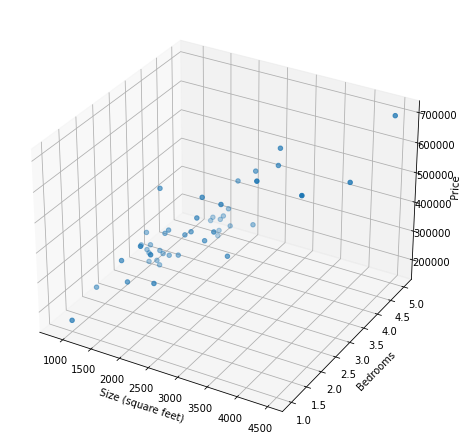

In [3]:
fig_1 = plt.figure(figsize=(10,6))
ax_1 = Axes3D(fig_1)

# Save sizes, bedrooms and prices
size = data['Size (square feet)']
bedrooms = data['Bedrooms']
price = data['Price']

ax_1.scatter(size, bedrooms, price)
ax_1.set_xlabel('Size (square feet)')
ax_1.set_ylabel('Bedrooms')
ax_1.set_zlabel('Price')

We need to perform the feature scaling, because house sizes are about 1000 times the number of bedrooms. It will make gradient descent converge much more quickly.

In [4]:
data.iloc[:,0:2] = (data.iloc[:,0:2] - data.iloc[:,0:2].mean()) / data.iloc[:,0:2].std()
data.head()

,Size (square feet),Bedrooms,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


Add a column of ones to dataset so we can use a vectorized solution to computing the cost and gradients

In [5]:
data.insert(0, 'Ones', 1)

Split our dataset into features set and labels set

In [6]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]

In [7]:
X.head()

,Ones,Size (square feet),Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [8]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: Price, dtype: int64

We will use numpy arrays to perform further computations

In [9]:
X = X.to_numpy() # (47, 3)
y = y.to_numpy() # (47,)

# Convert 1D array y to 2D array (column vector)
y = np.reshape(y, (-1, 1)) # (47, 1)

# Initialize fitting parameters
theta = np.zeros((3,1)) # (3, 1)

Define function that computes cost

In [10]:
def compute_cost(X, y, theta):
    # number of training examples 
    m = X.shape[0]

    # hypothesis
    h = np.dot(X, theta) # (m, 1)

    error = h - y
    error_sqr = np.square(error)
    return np.sum(error_sqr) / (2*m)


In [11]:
J = compute_cost(X, y, theta)
print(J)

65591548106.45744


Implement gradient descent

In [12]:
def gradient_descent(X, y, theta, l_rate, num_iters):
    # List of costs after each gradient descent step
    J_list = []

    # number of training examples 
    m = X.shape[0]

    for i in range(num_iters):
        # hypothesis
        h = np.dot(X, theta) # (m, 1)

        error = h - y
        theta = theta - l_rate * np.dot(X.T, error) / m

        J_list.append(compute_cost(X, y, theta))

    return (theta, J_list)

Run gradient descent

In [13]:
l_rate = 0.01
num_iters = 1000
theta, J_list = gradient_descent(X, y, theta, l_rate, num_iters)
print(theta)

[[340397.96353532]
 [109848.00846026]
 [ -5866.45408497]]


Plot the convergence graph

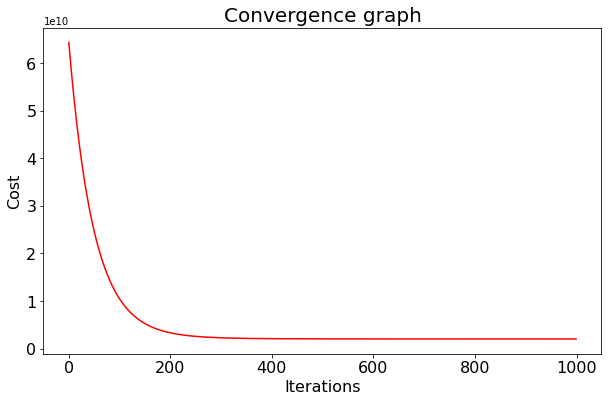

In [14]:
fig_2, ax_2 = plt.subplots()
fig_2.set_size_inches(10, 6)
ax_2.plot(range(num_iters), J_list, c='red')

ax_2.set_title('Convergence graph', fontsize=20)
ax_2.set_xlabel('Iterations', fontsize=16)
ax_2.set_ylabel("Cost", fontsize=16)
ax_2.tick_params(axis='both', which='major', labelsize=16)

Compute the final cost

In [15]:
J = compute_cost(X, y, theta)
print(J)

2043544218.7812896


Plot the linear fit

Text(0.5, 0, 'Price')

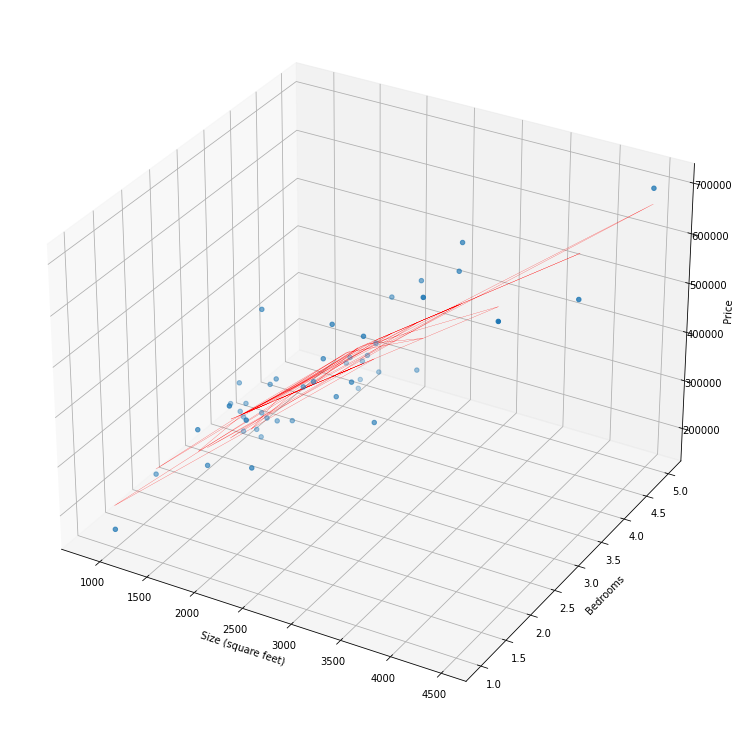

In [16]:
fig_1 = plt.figure(figsize=(10,10))
ax_1 = Axes3D(fig_1)

ax_1.scatter(size, bedrooms, price)
ax_1.plot(xs=size, ys=bedrooms, zs=np.dot(X, theta).flatten(), c='r', linewidth=0.2)
ax_1.set_xlabel('Size (square feet)')
ax_1.set_ylabel('Bedrooms')
ax_1.set_zlabel('Price')